# Compare All Classification Algorithm

### SOURCE and Note
- [kfold](https://www.tensorflow.org/tensorboard/image_summaries)
- Dont use 99 % dataset, became overfit

## Import Library

In [1]:
from pandas import read_csv
from matplotlib import pyplot

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import SGDClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier



## Input Dataset

In [2]:
url = "/home/jos/tf_lab/Ultralight-SimplePose/generator_dataset/dataset_file_5.csv"
# url = "dataset_file_5.csv"

data_title = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','res']

dataset = read_csv(url, names=data_title)
array = dataset.values

X = array[:,:-1]
y = array[:,len(data_title)-1]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, shuffle=True)

### Print

In [3]:
X_train

array([[0.677361, 0.706271, 0.710177, ..., 0.44274 , 0.833802, 0.837428],
       [0.616573, 0.68694 , 0.681059, ..., 0.221813, 0.734143, 0.742444],
       [0.597007, 0.625438, 0.625438, ..., 0.378516, 0.814998, 0.775116],
       ...,
       [0.40123 , 0.479084, 0.493286, ..., 0.475319, 0.675394, 0.636844],
       [0.763632, 0.799725, 0.799579, ..., 0.42795 , 0.82501 , 0.803306],
       [0.71791 , 0.753149, 0.753149, ..., 0.466114, 0.779191, 0.831927]])

In [4]:
X_validation

array([[0.718649, 0.753802, 0.754532, ..., 0.456686, 0.766441, 0.854383],
       [0.432323, 0.509481, 0.492192, ..., 0.477597, 0.674163, 0.635614],
       [0.798736, 0.83503 , 0.83503 , ..., 0.450387, 0.76594 , 0.825341],
       ...,
       [0.469996, 0.521619, 0.539431, ..., 0.349757, 0.659002, 0.598643],
       [0.559258, 0.608657, 0.578868, ..., 0.368401, 0.641143, 0.681526],
       [0.559026, 0.58799 , 0.578327, ..., 0.368207, 0.621653, 0.676733]])

In [5]:
Y_train

array([2., 3., 3., 2., 3., 3., 1., 1., 3., 2., 1., 2., 2., 3., 2., 2., 1.,
       3., 3., 2., 1., 1., 1., 2., 2., 2., 2., 3., 3., 1., 2., 1., 3., 1.,
       3., 2., 2., 3., 1., 3., 2., 1., 1., 3., 1., 3., 1., 1., 2., 2., 1.,
       1., 1., 3., 1., 3., 2., 3., 3., 3., 2., 2., 1., 2., 2., 1., 1., 1.,
       2., 1., 2., 2., 2., 2., 1., 2., 1., 3., 2., 3., 1., 2., 2., 1., 2.,
       1., 3., 1., 2., 3., 3., 1., 2., 2., 2., 3., 3., 1., 3., 3., 1., 1.,
       2., 2., 2., 3., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 3., 3., 3.,
       2., 2., 1., 3., 2., 3., 1., 1., 1., 1., 1., 3., 1., 1., 2., 1., 2.,
       1., 3., 2., 1., 2., 3., 2., 3., 3., 2., 3., 3., 1., 1., 1., 2., 3.,
       1., 2., 2., 1., 1., 1., 2., 2., 3., 3., 1., 1., 1., 1., 2., 2., 3.,
       2., 1., 2., 1., 1., 1., 3., 2., 2., 1., 3., 2., 2., 3., 1., 2., 2.,
       2., 1., 1., 3., 2., 1., 2., 2., 2., 1., 3., 2., 1., 2., 1., 2., 1.,
       2., 1., 1., 3., 1., 3., 2., 2., 2., 1., 1., 2., 3., 2., 1., 2., 3.,
       2., 1., 3., 2., 1.

In [6]:
Y_validation

array([2., 1., 2., 2., 2., 3., 2., 1., 3., 3., 1., 3., 3., 2., 1., 1., 1.,
       1., 3., 3., 1., 3., 3., 3., 1., 3., 2., 1., 1., 1., 3., 1., 2., 1.,
       2., 2., 1., 3., 3., 3., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 3.,
       1., 2., 1., 1., 1., 2., 1., 2., 3., 1., 2., 3., 1., 1., 2., 2., 2.,
       2., 1., 2., 2., 2., 2., 3., 2., 2., 2., 1., 3., 2., 3., 1., 2., 1.,
       3., 3., 3., 1., 2., 3., 3., 3., 2., 2., 2., 1., 3., 1., 1., 3., 1.,
       1., 3., 3., 1., 2., 1., 3., 3., 1., 3., 1., 1., 1., 2., 2., 3., 1.,
       3., 3., 2., 1., 3., 3., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1.,
       2., 2., 3., 2., 3., 2., 1., 2., 3., 3., 1., 2., 1., 1., 1., 2., 3.,
       3., 1., 1., 1., 1., 2., 3., 1., 1., 1.])

## Training

### Load Model to List

In [7]:
# Spot Check Algorithms
models = []
models.append(('AB', AdaBoostClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('NNMLP', MLPClassifier(alpha=1, max_iter=1000)))
models.append(('GB', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [8]:
results = []
names = []
for name, model in models:
    # print(name,'-',model)
    kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(name,': ',cv_results)


AB :  [1.         1.         1.         1.         0.98461538 1.
 1.         1.         1.         1.        ]
SGD :  [1.         0.98461538 0.98461538 0.98461538 0.98461538 1.
 1.         1.         1.         1.        ]
NNMLP :  [1.         1.         0.98461538 0.98461538 0.98461538 1.
 1.         1.         1.         1.        ]
GB :  [1.         1.         1.         0.98461538 0.98461538 1.
 0.98461538 1.         1.         1.        ]
RF :  [1.         1.         1.         1.         0.98461538 1.
 1.         1.         1.         1.        ]
KNN :  [1.         1.         0.98461538 1.         0.98461538 1.
 1.         1.         1.         1.        ]
CART :  [1.         1.         1.         1.         0.98461538 1.
 1.         1.         1.         1.        ]
NB :  [1.         1.         0.98461538 1.         0.96923077 1.
 1.         1.         1.         1.        ]
SVM :  [1.         1.         0.98461538 0.98461538 0.98461538 1.
 1.         1.         1.         1.   

In [9]:
for i in range(len(results)):
    # print(type(results[i]))
    print('%s : \t\t%f \t\t %f' %(names[i], results[i].mean(), results[i].std() ))
    # print(names[i],' : \n',results[i])

AB : 		0.998462 		 0.004615
SGD : 		0.993846 		 0.007537
NNMLP : 		0.995385 		 0.007050
GB : 		0.995385 		 0.007050
RF : 		0.998462 		 0.004615
KNN : 		0.996923 		 0.006154
CART : 		0.998462 		 0.004615
NB : 		0.995385 		 0.009851
SVM : 		0.995385 		 0.007050


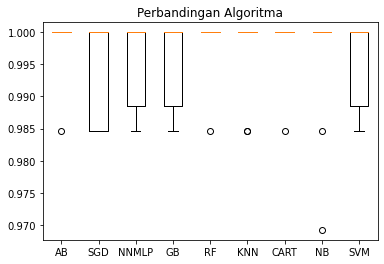

In [10]:
pyplot.boxplot(results, labels = names)
pyplot.title('Perbandingan Algoritma')
pyplot.show()